In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

## Import Data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Analysis Data

In [3]:
df.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

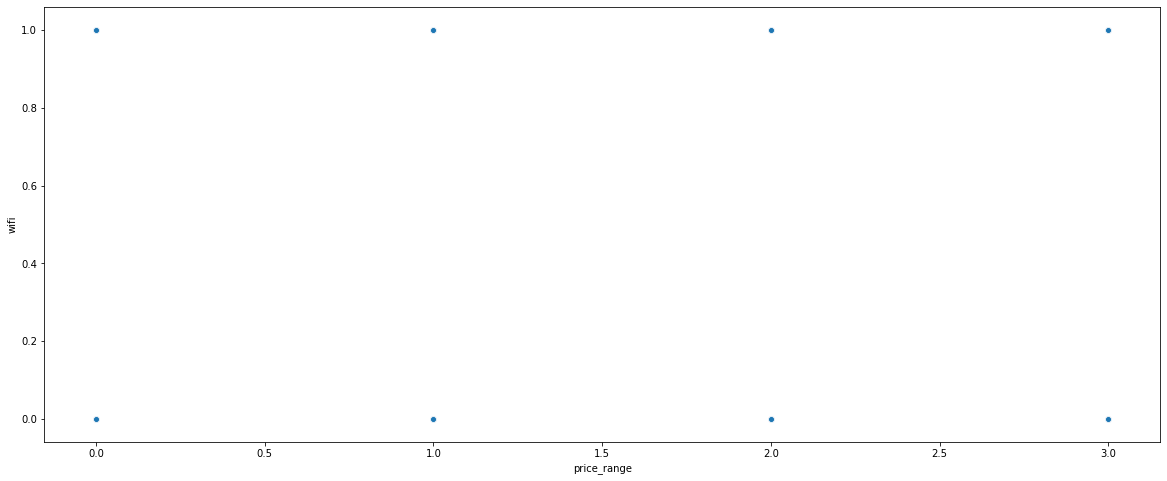

In [4]:
plt.figure(figsize=(20,8))
sns.scatterplot(df.price_range, df.wifi)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Visualization for Analysis

### How does RAM Affected Price

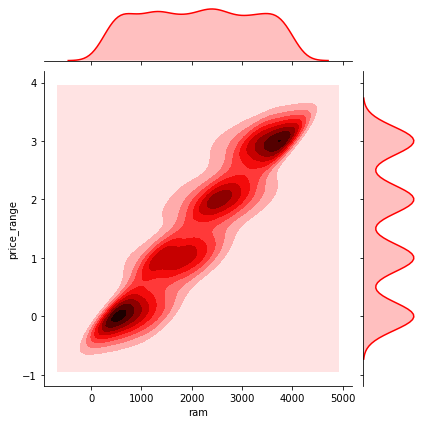

In [7]:
sns.jointplot(df['ram'],df['price_range'],color='red',kind='kde');

### Internal Memory vs Price

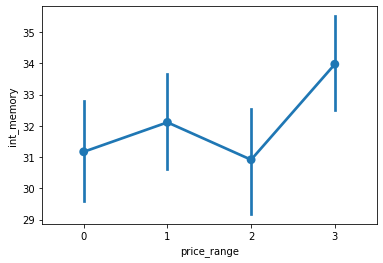

In [8]:
sns.pointplot(df["price_range"],df["int_memory"])

### % Phone that Support 3G

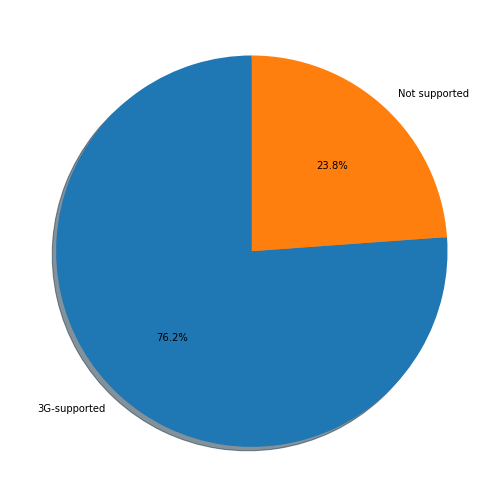

In [9]:
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
plt.figure(figsize=(9,9))
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### % Phone that Support 4G

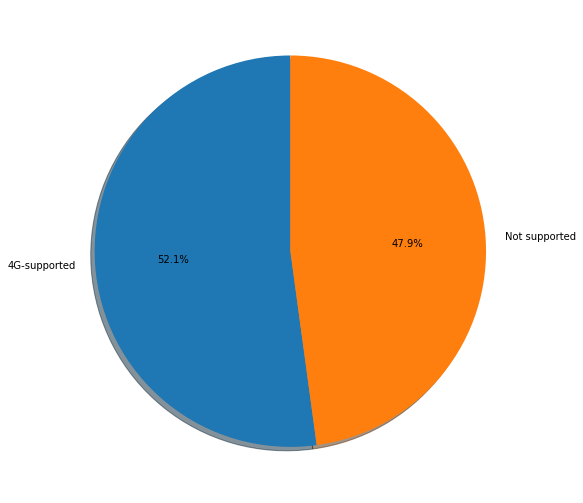

In [10]:
labels4g = ["4G-supported",'Not supported']
values4g = df['four_g'].value_counts().values



plt.figure(figsize=(9,9))
plt.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Battery power vs Price Range

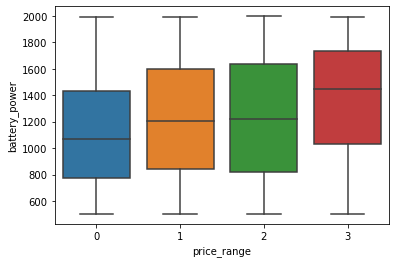

In [11]:
sns.boxplot(df["price_range"], df["battery_power"])
plt.savefig('box_price_batt.png');

###  No of Phones vs Camera megapixels of front and primary camera

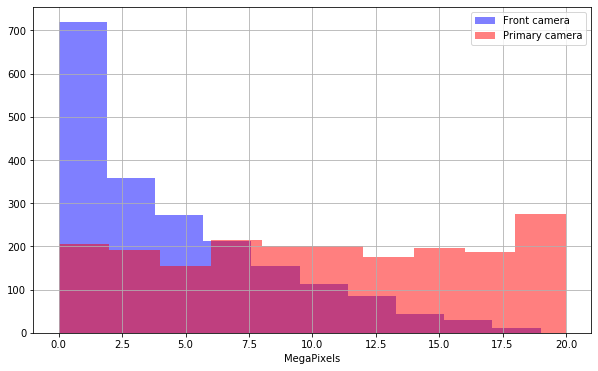

In [12]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
plt.savefig('hist_camera.png');


### Mobile Weght vs Price range

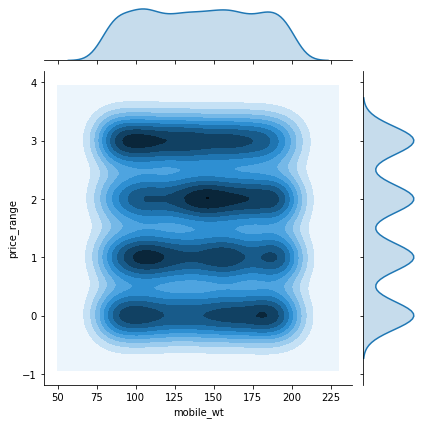

In [13]:
sns.jointplot(df['mobile_wt'],df['price_range'],kind='kde')
plt.savefig('price_weight.png');

### Talk time vs Price range

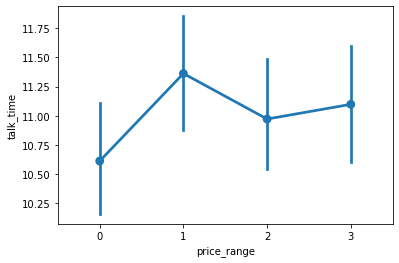

In [14]:
sns.pointplot(df["price_range"], df["talk_time"])
plt.savefig('price_talktime.png');

## Splitting Data

In [15]:
X = df.drop(columns="price_range")
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 20), (300, 20), (1700,), (300,))

# Creating Models

## KNearest Neighbors

In [16]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9433333333333334

### Define optimum N_neighbors using Elbow Method

Text(0, 0.5, 'Error Rate')

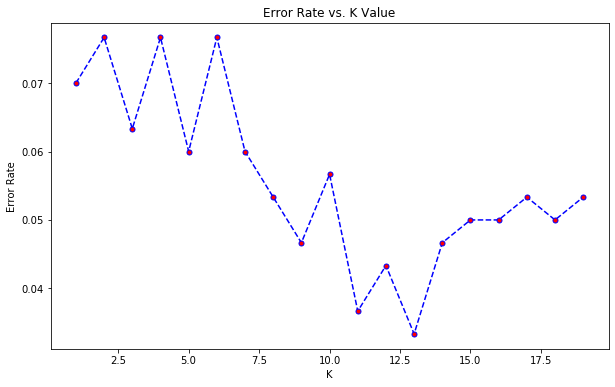

In [17]:


error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Logistic Regression

In [18]:

logmodel = LogisticRegression(solver='liblinear', max_iter=50, penalty='l1')

logmodel.fit(X_train,y_train)
logmodel.score(X_test,y_test)

0.8433333333333334

## Decision Tree

In [19]:

dtree = DecisionTreeClassifier()


dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
dtree.score(X_test,y_test)

0.8333333333333334

## Random Forest

In [21]:
RF = RandomForestClassifier()


RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Hyper Parameter Tuning

## KNN Hyper Parameter Tuning

In [22]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
paramKNN = {"n_neighbors" : np.arange(1, 20, 2), 
            "weights" : ['uniform', 'distance'],
            'p':[2, 1]
    
}

In [24]:
modelKNN = GridSearchCV(estimator=KNeighborsClassifier(),param_grid= paramKNN,
                        cv=3, n_jobs=-1, verbose=1)

In [25]:
modelKNN.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [26]:
modelKNN.best_score_

0.9288290197202643

## Random Forest Hyper Parameter Tuning

In [27]:
paramR = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
paramR

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [28]:
modelRF = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=paramR,
                            cv=3, n_jobs=-1, verbose=1, n_iter=25)

In [ ]:
modelRF.fit(X_train, y_train)
modelRF.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


## Decision Tree Hyper Parameter Tuning

In [ ]:
paramD = {
 'max_depth': np.arange(1, 25),
 'min_samples_leaf': np.arange(1, 20),
 'min_samples_split': np.arange(2, 20),
 }


In [ ]:
ModelDT = RandomizedSearchCV(estimator=DecisionTreeClassifier(), 
                             param_distributions=paramD, cv=3, n_jobs=-1, verbose=1)

In [ ]:
ModelDT.fit(X_train, y_train)

## Evaluation Matrix Comparison - Hyper Parameter Tuned Algorithm

In [ ]:
def Eva_Matrix_Class(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred, average='weighted')
    Prec = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
    df_cm = pd.DataFrame(data=cm, columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3'], index=['Akt 0', 'Akt 1', 'Akt 2', 'Akt 3'])
    cr = classification_report(y_true, y_pred)
    return Acc, Rec, Prec, f1, df_cm, cr

### Evaluation Matrix KNN Tuned

In [ ]:
Acc_Knn, Rec_Knn, Prec_Knn, f1_Knn, cm_Knn, cr_Knn = Eva_Matrix_Class(modelKNN, X_train, y_train)

In [ ]:
Acc_Knn2, Rec_Knn2, Prec_Knn2, f1_Knn2, cm_Knn2, cr_Knn2 = Eva_Matrix_Class(modelKNN, X_test, y_test)

In [ ]:
print(cr_Knn2)

In [ ]:
print(cr_Knn)

### Evaluation Matrix RF Tuned

In [ ]:
Acc_RF, Rec_RF, Prec_RF, f1_RF, cm_RF, cr_RF = Eva_Matrix_Class(modelRF, X_train, y_train)

In [ ]:
Acc_RF2, Rec_RF2, Prec_RF2, f1_RF2, cm_RF2, cr_RF2 = Eva_Matrix_Class(modelRF, X_test, y_test)

In [ ]:
print(cr_RF)

In [ ]:
print(cr_RF2)

### Evaluation Matrix DT Tuned

In [ ]:
Acc_DT, Rec_DT, Prec_DT, f1_DT, cm_DT, cr_DT = Eva_Matrix_Class(ModelDT, X_train, y_train)

In [ ]:
Acc_DT2, Rec_DT2, Prec_DT2, f1_DT2, cm_DT2, cr_DT2 = Eva_Matrix_Class(ModelDT, X_test, y_test)

In [ ]:
print(cr_DT)

In [ ]:
print(cr_DT2)

## Metrics Comparison

In [ ]:
eM = {
    "KNNTuned_Test" : [Acc_Knn2, Rec_Knn2, Prec_Knn2, f1_Knn2],
    "RFTuned_Test" : [Acc_RF2, Rec_RF2, Prec_RF2, f1_RF2],
    "DTTuned_Test" : [Acc_DT2, Rec_DT2, Prec_DT2, f1_DT2]
}
pd.DataFrame(data=eM, index=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Conclusion : The Best Model is KNearest Neighbors Tuned

### Confusion Metrics

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cm_Knn2, annot=True, cbar=False);